## The CIFAR10 Dataset

[Keras CIFAR10 info](https://keras.io/api/datasets/cifar10)
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
[CIFAR10 home page](https://www.cs.toronto.edu/~kriz/cifar.html)

#### By Mario Jerez
#### Lab Exercise
#### Bio-inspired Artificial Intelligence
# Categorizing Images

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [2]:
def plot_history(history):
    loss_values = history.history['loss']
    accuracy_values = history.history['accuracy']
    validation = 'val_loss' in history.history
    if validation:
        val_loss_values = history.history['val_loss']
        val_accuracy_values = history.history['val_accuracy']
    epoch_nums = range(1, len(loss_values)+1)
    plt.figure(figsize=(12,4)) # width, height in inches
    plt.subplot(1, 2, 1)
    if validation:
        plt.plot(epoch_nums, loss_values, 'r', label="Training loss")
        plt.plot(epoch_nums, val_loss_values, 'r--', label="Validation loss")
        plt.title("Training/validation loss")
        plt.legend()
    else:
        plt.plot(epoch_nums, loss_values, 'r', label="Training loss")
        plt.title("Training loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    if validation:
        plt.plot(epoch_nums, accuracy_values, 'b', label='Training accuracy')
        plt.plot(epoch_nums, val_accuracy_values, 'b--', label='Validation accuracy')
        plt.title("Training/validation accuracy")
        plt.legend()
    else:
        plt.plot(epoch_nums, accuracy_values, 'b', label='Training accuracy')
        plt.title("Training accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.show()

### Prepare the data

In [3]:
(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
## Use the first thousand of test set as validation set
validation_images = test_images[:1000]
validation_labels = test_labels[:1000]

## Remove those thousand from the test set
test_images = test_images[1000:]
test_labels = test_labels[1000:]

print(validation_images.shape)
print(test_images.shape)

(1000, 32, 32, 3)
(9000, 32, 32, 3)


In [6]:
train_images.shape

(50000, 32, 32, 3)

In [7]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#### Normalize the Data

In [8]:
# normalize the data
if train_images.dtype == np.uint8:
    train_images = train_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255
    validation_images = validation_images.astype('float32') / 255

In [9]:
train_images[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [10]:
train_images.dtype, train_images.min(), train_images.max()

(dtype('float32'), 0.0, 1.0)

In [11]:
test_images.dtype, test_images.min(), test_images.max()

(dtype('float32'), 0.0, 1.0)

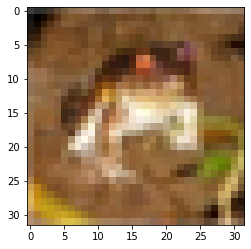

In [12]:
plt.imshow(train_images[0]);

In [13]:
train_labels.shape

(50000, 1)

In [14]:
train_labels[0]

array([6], dtype=uint8)

In [15]:
train_labels[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [16]:
train_labels[0][0]

6

In [17]:
def label_name(n):
    names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
             'dog', 'frog', 'horse', 'ship', 'truck']
    return names[n]

In [18]:
label_name(6)

'frog'

In [19]:
def show_random_image():
    n = random.randrange(50000)
    category_num = train_labels[n][0]
    print("train_images[{}]: '{}'".format(n, label_name(category_num)))
    plt.imshow(train_images[n])

train_images[43074]: 'frog'


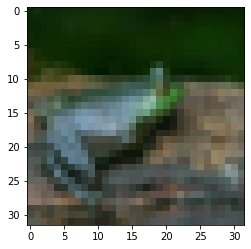

In [20]:
show_random_image()

In [21]:
def show_random_selection(category_num):
    assert 0 <= category_num <= 9, "category must be in range 0-9"
    images = [train_images[i] for i in range(50000) if train_labels[i][0] == category_num]
    category_name = label_name(category_num)
    plt.figure(figsize=(15,15))  # (width, height) in inches
    rows, columns = 5, 6
    for k in range(1, columns*rows+1):
        img = random.choice(images)
        plt.subplot(rows, columns, k)
        plt.title(category_name)
        plt.axis('off')
        plt.imshow(img)

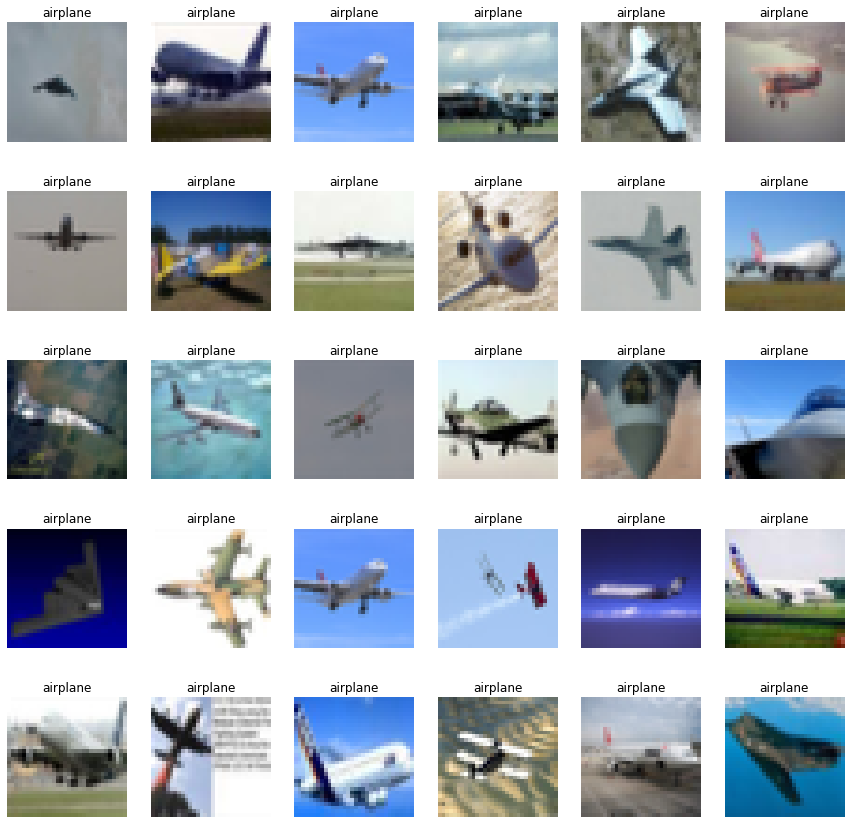

In [22]:
show_random_selection(0)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
# create the one-hot target vectors
train_targets = to_categorical(train_labels)
test_targets = to_categorical(test_labels)
validation_targets = to_categorical(validation_labels)

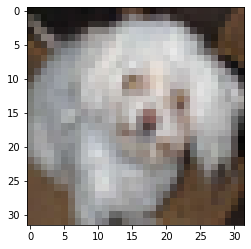

In [25]:
plt.imshow(test_images[0]);

In [26]:
test_labels[0]

array([5], dtype=uint8)

In [27]:
label_name(3)

'cat'

In [28]:
test_targets[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Grayscale version of the images

In [29]:
# converts a color image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb, [0.2989, 0.5870, 0.1140]).astype('float32') #returns the dot product, a scalar

train_images_gray = rgb2gray(train_images)
test_images_gray = rgb2gray(test_images)
validation_images_gray = rgb2gray(validation_images)

In [30]:
train_images_gray.dtype, train_images_gray.min(), train_images_gray.max()

(dtype('float32'), 0.0, 0.9999)

In [31]:
train_images_gray.shape

(50000, 32, 32)

In [32]:
test_images_gray.shape

(9000, 32, 32)

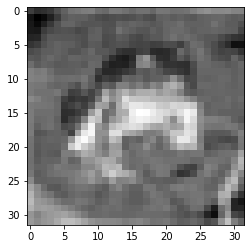

In [33]:
plt.imshow(train_images_gray[0], cmap='gray');

### Build and train the network

Things to try:

* Start with a network similar to our MNIST network from class, except use a Flatten layer of shape (32, 32, 3) so that the network can accept color CIFAR10 images.
* Train the network for at least 30 epochs.
* Experiment with different optimizers: RMSprop, Adam, NAdam, SGD with learning_rate/momentum.
* Experiment with different numbers of hidden units in the hidden layer.
* Try adding another hidden layer or two to the network.
* Try modifying the network to learn the grayscale version of the images instead of the color images.

What is the best overall performance on the test images (color or grayscale) that you can achieve?

### First I try with a basic feedforward network.
I suspect it won't be that effective because these images are not oriented similarly or taken in similar context

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [35]:
network = Sequential()
network.add(Flatten(input_shape=(32,32,3)))
network.add(Dense(30, activation='relu', name='hidden1'))
network.add(Dense(30, activation='relu', name='hidden2'))
network.add(Dense(30, activation='relu', name='hidden3'))
network.add(Dense(10, activation='softmax', name='output'))

In [36]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
hidden1 (Dense)              (None, 30)                92190     
_________________________________________________________________
hidden2 (Dense)              (None, 30)                930       
_________________________________________________________________
hidden3 (Dense)              (None, 30)                930       
_________________________________________________________________
output (Dense)               (None, 10)                310       
Total params: 94,360
Trainable params: 94,360
Non-trainable params: 0
_________________________________________________________________


In [37]:
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [38]:
history = network.fit(train_images, train_targets, epochs=30, batch_size=64, validation_data=(validation_images,validation_targets))

Epoch 1/30
782/782 [==============================] - 4s 4ms/step - loss: 2.1261 - accuracy: 0.1949 - val_loss: 2.0043 - val_accuracy: 0.2530
Epoch 2/30
782/782 [==============================] - 2s 3ms/step - loss: 1.9123 - accuracy: 0.2994 - val_loss: 1.8786 - val_accuracy: 0.3040
Epoch 3/30
782/782 [==============================] - 3s 3ms/step - loss: 1.8486 - accuracy: 0.3297 - val_loss: 2.0232 - val_accuracy: 0.2570
Epoch 4/30
782/782 [==============================] - 3s 3ms/step - loss: 1.8092 - accuracy: 0.3463 - val_loss: 2.0622 - val_accuracy: 0.2490
Epoch 5/30
782/782 [==============================] - 2s 3ms/step - loss: 1.7874 - accuracy: 0.3525 - val_loss: 1.8814 - val_accuracy: 0.2850
Epoch 6/30
782/782 [==============================] - 3s 3ms/step - loss: 1.7676 - accuracy: 0.3609 - val_loss: 1.9460 - val_accuracy: 0.3020
Epoch 7/30
782/782 [==============================] - 3s 3ms/step - loss: 1.7628 - accuracy: 0.3624 - val_loss: 1.8243 - val_accuracy: 0.3410
Epoch 

In [39]:
network.evaluate(train_images, train_targets)

1563/1563 [==============================] - 3s 2ms/step - loss: 1.6577 - accuracy: 0.3972


[1.65770423412323, 0.3972199857234955]

In [40]:
network.evaluate(test_images, test_targets)

282/282 [==============================] - 0s 2ms/step - loss: 1.7007 - accuracy: 0.3854


[1.700660228729248, 0.38544443249702454]

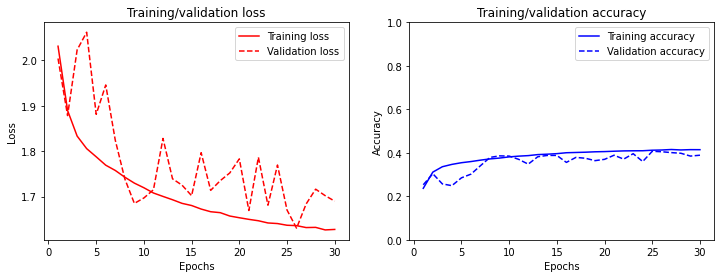

In [41]:
plot_history(history)

As expected, the basic feedforward network didn't work too well.

## Method 2: Convolutional Neural Network
To feed images to a ConvNet, they must be of shape (height, width, channels), even if the images are grayscale.

In [42]:
print(train_images_gray.shape)
print(test_images_gray.shape)

(50000, 32, 32)
(9000, 32, 32)


In [43]:
## That won't do

train_images_gray = train_images_gray.reshape(50000, 32, 32, 1)
test_images_gray = test_images_gray.reshape(9000, 32, 32, 1)
validation_images_gray = validation_images_gray.reshape(1000,32,32,1)
print("shape of train_images_gray: {}  shape of test_images_gray: {}".format(
    train_images_gray.shape, test_images_gray.shape))

shape of train_images_gray: (50000, 32, 32, 1)  shape of test_images_gray: (9000, 32, 32, 1)


In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
## con2D is that filter that computes the activation values for the next hidden layer.
## MaxPooling2D does the max pooling operation

In [45]:
def build_convnet():
    convnet = Sequential()
    convnet.add(Conv2D(64, (3,3), activation='relu', name='conv1', input_shape=(32,32,3))) #64 different features it'll look for,
    convnet.add(MaxPooling2D((2,2), name='pool1'))
    convnet.add(Conv2D(64, (3,3), activation='relu', name='conv2'))
    convnet.add(MaxPooling2D((2,2), name='pool2'))
    convnet.add(Conv2D(64, (3,3), activation='relu', name='conv3'))
    convnet.add(Flatten())
    convnet.add(Dense(64, activation='relu', name='hidden'))
    convnet.add(Dense(10, activation='softmax', name='output'))
    
    convnet.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])
    return convnet

In [46]:
convnet = build_convnet()

In [47]:
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 64)        1792      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
hidden (Dense)               (None, 64)               

In [48]:
history = convnet.fit(train_images, train_targets, epochs=30, batch_size=64, validation_data=(validation_images, validation_targets))

Epoch 1/30
782/782 [==============================] - 95s 121ms/step - loss: 1.8845 - accuracy: 0.3163 - val_loss: 1.3864 - val_accuracy: 0.5140
Epoch 2/30
782/782 [==============================] - 101s 129ms/step - loss: 1.3081 - accuracy: 0.5348 - val_loss: 1.3229 - val_accuracy: 0.5330
Epoch 3/30
782/782 [==============================] - 87s 112ms/step - loss: 1.0886 - accuracy: 0.6180 - val_loss: 1.0958 - val_accuracy: 0.6160
Epoch 4/30
782/782 [==============================] - 87s 111ms/step - loss: 0.9542 - accuracy: 0.6666 - val_loss: 0.9469 - val_accuracy: 0.6760
Epoch 5/30
782/782 [==============================] - 82s 105ms/step - loss: 0.8652 - accuracy: 0.6977 - val_loss: 1.0648 - val_accuracy: 0.6390
Epoch 6/30
782/782 [==============================] - 91s 116ms/step - loss: 0.7853 - accuracy: 0.7251 - val_loss: 0.9501 - val_accuracy: 0.6670
Epoch 7/30
782/782 [==============================] - 101s 130ms/step - loss: 0.7208 - accuracy: 0.7500 - val_loss: 0.9088 - val_

In [49]:
network.evaluate(test_images, test_targets)

282/282 [==============================] - 0s 2ms/step - loss: 1.7007 - accuracy: 0.3854


[1.700660228729248, 0.38544443249702454]

In [50]:
outputs = convnet.predict(test_images)

In [51]:
outputs.shape

(9000, 10)

In [52]:
predictions = [np.argmax(vector) for vector in outputs]

wrongIndices = [i for i in range(len(predictions)) if predictions[i] != test_labels[i]]

print("misclassified {} images out of {}.".format(len(wrongIndices), len(predictions)))

misclassified 2796 images out of 9000.


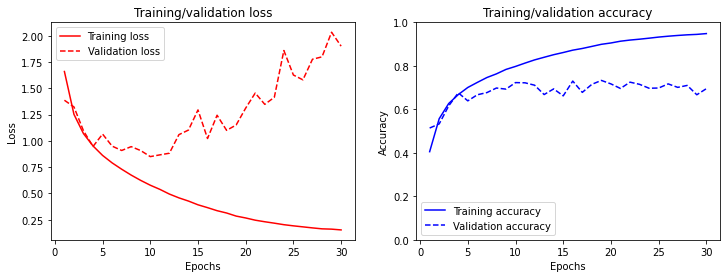

In [53]:
plot_history(history)

#### Looks like I overtrained after about 9 epochs. I'll train for only 10 this time.

In [54]:
convnet = build_convnet()
convnet.summary()
history = convnet.fit(train_images, train_targets, epochs=10, batch_size=64, validation_data=(validation_images, validation_targets))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 64)        1792      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
hidden (Dense)               (None, 64)               

misclassified 2796 images out of 9000 test images.


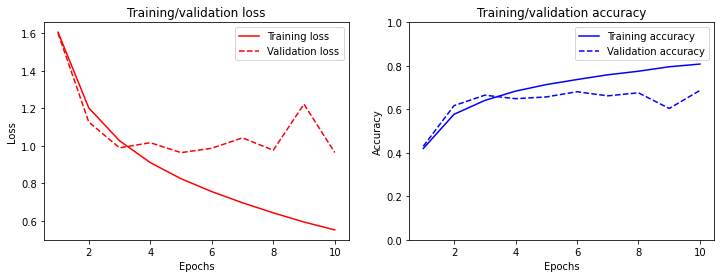

In [55]:
predictions = [np.argmax(vector) for vector in outputs]

wrongIndices = [i for i in range(len(predictions)) if predictions[i] != test_labels[i]]

print("misclassified {} images out of {} test images.".format(len(wrongIndices), len(predictions)))

plot_history(history)

Some Misclassified Images


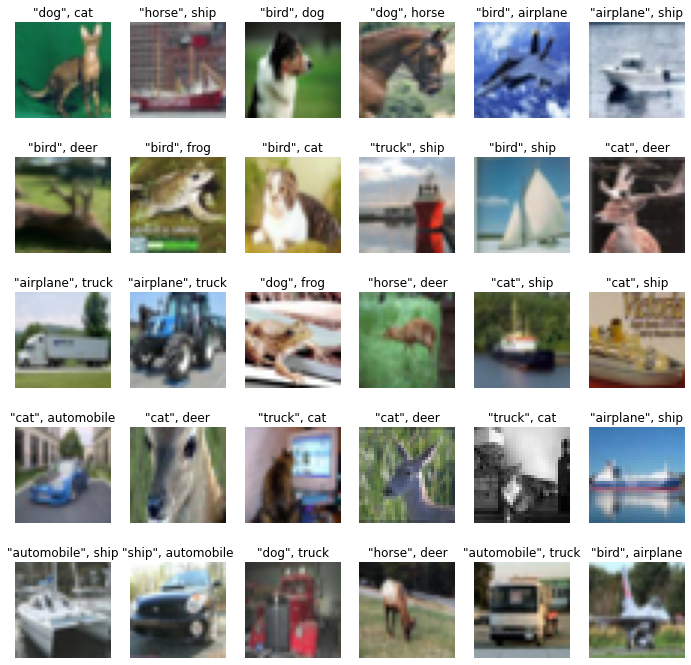

In [56]:

def show_wrong(wrong_indices, predictions):
    plt.figure(figsize=(12,12))  # (width, height) in inches
    rows, columns = 5, 6
    for i in range(1, columns*rows+1):
        w = random.choice(wrong_indices)
        img = test_images[w]
        target = np.argmax(test_targets[w])
        prediction = predictions[w]
        plt.subplot(rows, columns, i)
        plt.title('"{}", {}'.format(label_name(prediction), label_name(target)))
        plt.axis('off')
        plt.imshow(img)
        
print("Some Misclassified Images")
show_wrong(wrongIndices, predictions)

### Seeing how it does with gray-scale images

In [57]:
def build_convnet_gray():
    convnet = Sequential()
    convnet.add(Conv2D(64, (3,3), activation='relu', name='conv1', input_shape=(32,32,1))) #64 different features it'll look for,
    convnet.add(MaxPooling2D((2,2), name='pool1'))
    convnet.add(Conv2D(64, (3,3), activation='relu', name='conv2'))
    convnet.add(MaxPooling2D((2,2), name='pool2'))
    convnet.add(Conv2D(64, (3,3), activation='relu', name='conv3'))
    convnet.add(Flatten())
    convnet.add(Dense(64, activation='relu', name='hidden'))
    convnet.add(Dense(10, activation='softmax', name='output'))
    
    convnet.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])
    return convnet

In [58]:
convnet = build_convnet_gray()
convnet.summary()
history = convnet.fit(train_images_gray, train_targets, epochs=30, batch_size=64, validation_data=(validation_images_gray, validation_targets))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 64)        640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
hidden (Dense)               (None, 64)               

misclassified 3006 images out of 9000 test images.


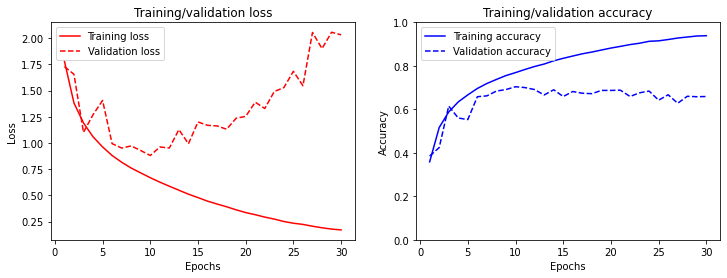

In [60]:
outputs = convnet.predict(test_images_gray)

predictions = [np.argmax(vector) for vector in outputs]

wrongIndices = [i for i in range(len(predictions)) if predictions[i] != test_labels[i]]

print("misclassified {} images out of {} test images.".format(len(wrongIndices), len(predictions)))

plot_history(history)

Some Misclassified Images


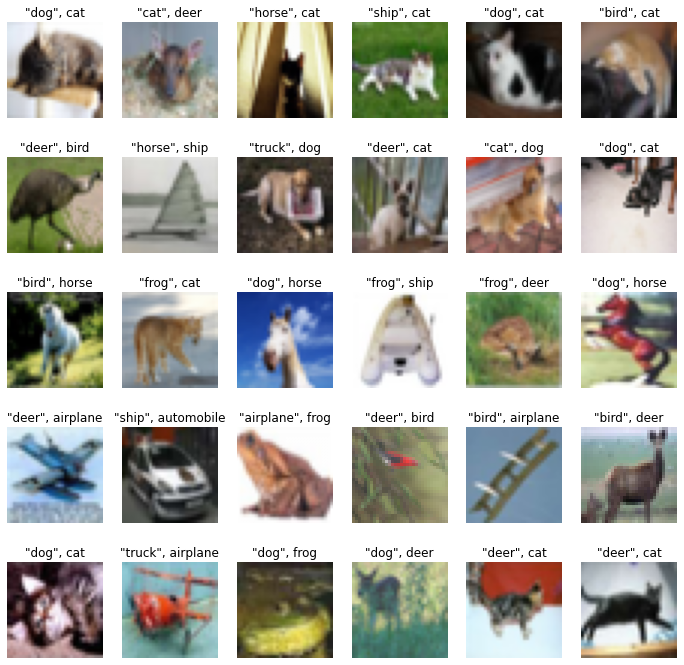

In [61]:
print("Some Misclassified Images")
show_wrong(wrongIndices, predictions)

Again, it looks like I started over-training after 10 or 11 epochs.  I'll train for 11 this time.

In [62]:
convnet = build_convnet_gray()
convnet.summary()
history = convnet.fit(train_images_gray, train_targets, epochs=11, batch_size=64, validation_data=(validation_images_gray, validation_targets))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 30, 30, 64)        640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 13, 13, 64)        36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
hidden (Dense)               (None, 64)               